# Fuzzy Clustering Means

## Pakai Library

In [2]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=edc74648b2ddc90674ff04602746771ce4146d99188edcebdff6a5c3560439c5
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
raw = pd.read_excel('data-facial-wash.xlsx')
raw.head()

,Merk_Produk,Harga,Jenis_Kulit,Rating,Jumlah_Terjual
0,Cetaphil Gentle Skin Cleanser,23250,1,3.504,1334
1,MS Glow Facial Wash,26500,2,4.231,978
2,COSRX Low pH Good Morning Gel Cleanser,16999,3,4.883,1243
3,COSRX Salicylic Acid Daily Gentle Cleanser,32500,4,4.654,256
4,Scarlett Whitening Facial Wash,21300,5,4.764,660


In [5]:
data = raw.drop(['Merk_Produk'], axis=1)
data.head()

,Harga,Jenis_Kulit,Rating,Jumlah_Terjual
0,23250,1,3.504,1334
1,26500,2,4.231,978
2,16999,3,4.883,1243
3,32500,4,4.654,256
4,21300,5,4.764,660


In [32]:
# Define hyperparameters
n_clusters_range = range(2, 15)
n_clusters = 3
max_iter = 1000
m = 2
error = 0.0001

In [33]:
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.to_numpy().T, n_clusters, m, error=error, maxiter=max_iter, init=None, seed=42
    )

# Predict cluster membership for each data2 point
cluster_membership = np.argmax(u, axis=0)

# Print the cluster centers
print('Cluster Centers:', cntr)

# Print the cluster membership for each data2 point
print('Cluster Membership:', cluster_membership)

Cluster Centers: [[2.45810727e+04 2.35350137e+00 4.25118099e+00 7.73599677e+02]
 [8.00445127e+04 3.41410734e+00 4.41113496e+00 8.16122053e+02]
 [3.19970743e+05 3.99998934e+00 3.99303961e+00 6.96011476e+02]]
Cluster Membership: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0]


In [34]:
d

array([[1.44423179e+03, 1.92978278e+03, 7.59658897e+03, 7.93582521e+03,
        3.28303979e+03, 6.38111690e+03, 8.41892810e+03, 1.05413584e+04,
        1.05897497e+04, 1.13072856e+04, 7.42229623e+03, 7.12158267e+03,
        9.08242873e+03, 4.38677523e+03, 8.71482404e+03, 2.58108869e+03,
        7.91929596e+03, 3.12198684e+04, 2.95418937e+05, 1.51310757e+04,
        7.05974721e+03, 1.34189481e+04, 7.69534128e+03, 7.34622933e+03,
        7.81994904e+03, 7.54189276e+04, 7.41979708e+03, 6.33158589e+03,
        7.91950204e+03, 4.04212638e+04, 3.45075549e+03, 6.03350520e+04,
        7.99892815e+03, 7.44051701e+03, 8.70660641e+03],
       [5.67968738e+04, 5.35447574e+04, 6.30469578e+04, 4.75478119e+04,
        5.87447201e+04, 6.18445480e+04, 4.70445353e+04, 6.60046220e+04,
        6.60461930e+04, 6.67698370e+04, 4.80452497e+04, 4.83427128e+04,
        6.45455238e+04, 5.98451044e+04, 6.41775529e+04, 5.80445352e+04,
        4.75445248e+04, 2.42453366e+04, 2.39955517e+05, 7.05945205e+04,
       

In [35]:
initialized_u = u0.T
initialized_u

array([[0.19156277, 0.41346394, 0.39497329],
       [0.65384161, 0.20949422, 0.13666417],
       [0.87644194, 0.11694624, 0.00661182],
       [0.28529923, 0.326081  , 0.38861977],
       [0.1197354 , 0.33779192, 0.54247267],
       [0.15490401, 0.1211851 , 0.72391089],
       [0.04385221, 0.37385079, 0.582297  ],
       [0.88874191, 0.03528442, 0.07597368],
       [0.32164088, 0.48655351, 0.19180561],
       [0.65397473, 0.23900879, 0.10701648],
       [0.01331287, 0.42848138, 0.55820575],
       [0.50916066, 0.16363481, 0.32720452],
       [0.49449824, 0.30893747, 0.19656428],
       [0.25812924, 0.66460629, 0.07726447],
       [0.26831228, 0.27278278, 0.45890494],
       [0.12407518, 0.65593471, 0.21999011],
       [0.1681843 , 0.42849135, 0.40332435],
       [0.24966849, 0.44699458, 0.30333694],
       [0.19509843, 0.40417045, 0.40073112],
       [0.21392766, 0.43919829, 0.34687405],
       [0.37007499, 0.55758926, 0.07233575],
       [0.14820362, 0.09401782, 0.75777856],
       [0.

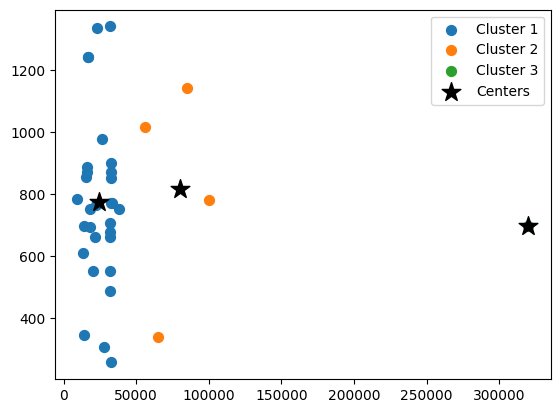

In [36]:
# Plot results (adjust if you have more than 2 features)
data_plot = data.to_numpy()
for j in range(n_clusters):
    plt.scatter(data_plot[:, 0][cluster_membership == j],
                data_plot[:, 3][cluster_membership == j],
                s=50, label=f'Cluster {j+1}')

plt.scatter(cntr[:, 0], cntr[:, 3], s=200, c='black', marker='*', label='Centers')
plt.legend()
plt.show()